In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = gdp_df[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [8]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [9]:
gdp_df = gdp_df.rename(columns ={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df.shape

(6868, 3)

gdp has 6,868 rows and 3 columns

In [12]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [13]:
gdp_df = gdp_df.astype({"Country":'string', "Year": int})

In [14]:
gdp_df.dtypes

Country            string
Year                int32
GDP_Per_Capita    float64
dtype: object

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
gdp_df['Year'].describe()

count    6868.000000
mean     2004.829354
std         8.573176
min      1990.000000
25%      1998.000000
50%      2005.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

<AxesSubplot:>

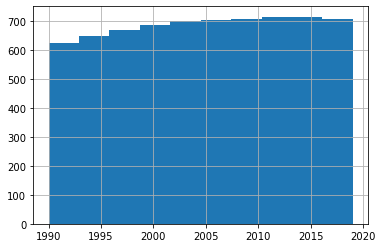

In [16]:
gdp_df['Year'].hist()

The histogram shows that there are slightly more observation in the years 2010- 2015

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [17]:
gdp_df['Country'].describe()

count                       6868
unique                       238
top       Caribbean small states
freq                          30
Name: Country, dtype: object

In [18]:
gdp_df['Country'].value_counts()

Caribbean small states       30
United Arab Emirates         30
Jamaica                      30
Spain                        30
Argentina                    30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: Int64

There are 238 countries represented in the dataset. 
The countries list represented are Djibouti, Turks and Caicos Islands. They may have few observations because ?? 

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [19]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [20]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470


10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [21]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

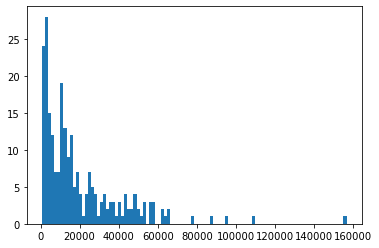

In [22]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins = 100);

The distribution is skewed right. 

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [23]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [24]:
gdp_pivoted = gdp_df[(gdp_df['Year'] >= 1990) & (gdp_df['Year'] <=2017)]
gdp_pivoted = gdp_pivoted.pivot(index = 'Country', columns = 'Year', values = 'GDP_Per_Capita')
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1484.114729,1758.904043,1957.029338,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123


In [25]:
#Drop rows

gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted.shape

(207, 28)

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [26]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,50.138980


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [27]:
neg_percent_chg = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
neg_percent_chg.shape[0]

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
    Bonus: Put both line charts on the same plot.

In [28]:
#highest_chg = gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()]

In [29]:
#highest_chg

In [30]:
EqGu = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']


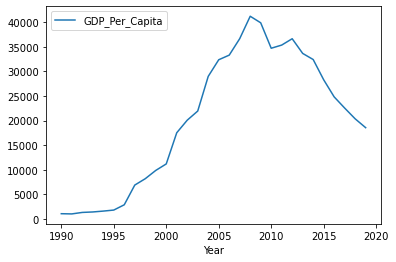

In [31]:
EqGu.plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')
#EqGu.plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')
plt.show()

In [32]:
gdp_piv_sorted = gdp_pivoted.sort_values('Percent_Change', ascending = False)

In [33]:
gdp_piv_sorted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1039.985049,996.857617,1299.934196,1395.403468,1572.065607,1781.264878,2857.452417,6868.480369,8166.052518,9851.190917,...,39913.732604,34732.255956,35378.023284,36671.357436,33678.706547,32436.466793,28313.602763,24827.072978,22551.083246,2068.404561
China,1423.896348,1534.705272,1731.657215,1949.534268,2178.924057,2391.477116,2601.363426,2812.711135,3004.427342,3206.730026,...,8069.354638,8884.588031,9686.615290,10397.561415,11149.867559,11917.338496,12691.821553,13487.822482,14344.421239,907.406281
Myanmar,619.645144,607.457440,658.107935,689.908458,733.066003,774.746266,814.446285,849.486563,887.804748,972.821899,...,2874.780227,3129.920812,3279.665296,3491.185032,3753.322305,4020.037369,4268.500515,4482.924518,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,2303.744681,2501.497357,2722.465021,2959.511216,3200.112095,3436.857940,3619.194664,3601.103502,3768.941584,...,7840.199166,8526.339106,9156.623442,9765.626608,10377.866125,10993.913250,11624.944284,12276.813285,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,2328.906789,2528.879651,2752.347920,2992.057409,3235.326758,3474.644494,3658.896664,3640.498262,3810.078820,...,7924.615987,8617.889497,9254.695552,9869.953555,10488.450390,11110.766274,11748.180530,12406.572927,13123.151792,497.334945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,1201.677234,1165.239450,1060.638246,1033.830619,1053.746606,1098.896607,1027.650659,1055.256506,1078.451654,1091.362361,...,1161.189475,1201.351375,1242.715645,1300.287637,824.943832,822.610458,852.749426,884.494417,912.802052,-24.039332
Ukraine,15751.722440,14396.632702,12962.935705,11112.677652,8606.613502,7616.545726,6915.978305,6769.916116,6700.900302,6750.840855,...,11298.390956,11778.313696,12466.807792,12527.465501,12552.669761,12408.951598,11237.074457,11534.638002,11871.123624,-24.636028
Burundi,1184.842440,1215.886531,1202.107139,1105.228876,1044.715537,947.822368,861.482737,839.196845,870.044082,850.048016,...,831.564131,846.169527,852.502622,862.716086,877.274160,886.235777,825.205986,794.604574,773.571858,-34.710993


In [34]:
gdp_piv_sorted_ind = gdp_piv_sorted.reset_index()

In [35]:
highest_chg_country = gdp_piv_sorted_ind['Country'][0]
highest_chg_country

'Equatorial Guinea'

In [36]:
scd_highest_chg_country = gdp_piv_sorted_ind['Country'][1]
scd_highest_chg_country

'China'

In [37]:
gdp_df.loc[(gdp_df['Country'] == highest_chg_country) |(gdp_df['Country'] == scd_highest_chg_country)]



,Country,Year,GDP_Per_Capita
1162,China,2019,16092.300767
1163,China,2018,15242.985858
1164,China,2017,14344.421239
1165,China,2016,13487.822482
1166,China,2015,12691.821553
1167,China,2014,11917.338496
1168,China,2013,11149.867559
1169,China,2012,10397.561415
1170,China,2011,9686.615290
1171,China,2010,8884.588031


<AxesSubplot:xlabel='Year'>

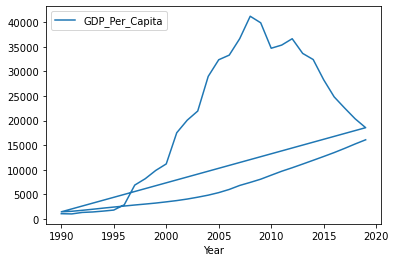

In [38]:
gdp_df.loc[(gdp_df['Country'] == highest_chg_country) |(gdp_df['Country'] == scd_highest_chg_country)].plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')


In [39]:
highest2= gdp_piv_sorted_ind['Country'][0:2]

In [40]:
highest2

0    Equatorial Guinea
1                China
Name: Country, dtype: object

In [41]:
#gdp_piv_sorted_ind['Percent_Change'][1]

In [42]:
#Subset rows from gdp_df
country_1 = gdp_df[gdp_df['Country'] == highest_chg_country]
country_2 = gdp_df[gdp_df['Country'] == scd_highest_chg_country]

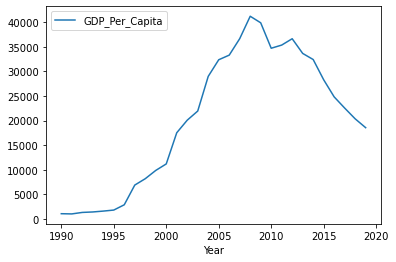

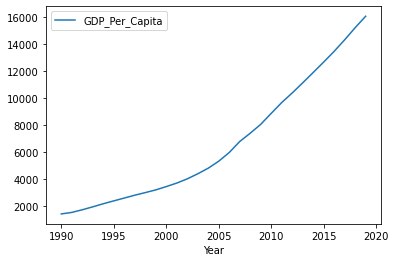

In [43]:
country_1.plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')
country_2.plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')

plt.plot

plt.show()

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset

In [44]:
continents = pd.read_csv('../data/continents.csv')

In [45]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [46]:
gdp_df = pd.merge(gdp_df, continents, how='inner')

19. Determine the number of countries per continent. Create a bar chart showing this.

In [47]:
gdp_df['Continent'].value_counts()

Africa           1428
Europe           1290
Asia             1240
North America     761
Oceania           394
South America     330
Name: Continent, dtype: int64

In [48]:
t = gdp_df.groupby('Continent')['Country'].nunique()

In [49]:
t

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

<AxesSubplot:xlabel='Continent'>

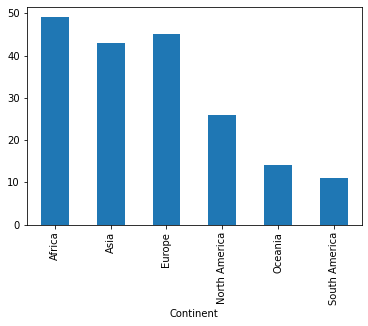

In [50]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')

20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [51]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Continent'>

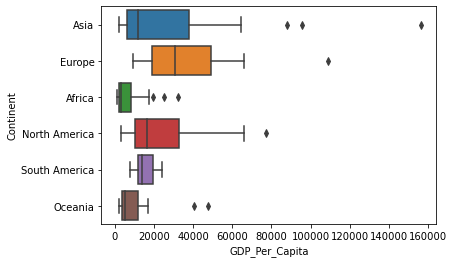

In [52]:
sns.boxplot(data=gdp_2014, x = 'GDP_Per_Capita', y = 'Continent')

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [53]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', skiprows = 4,  engine='python')

In [54]:
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.44400,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.60399,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy


In [55]:
life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [56]:
life_expectancy.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.44400,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.60399,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN


In [57]:
#Convert to long format
life_expectancy = pd.melt(life_expectancy, id_vars = ['Country Name'])


In [58]:
life_expectancy.head(2)

,Country Name,variable,value
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


In [59]:
#Rename columns
life_expectancy = life_expectancy.rename(columns={'Country Name':'Country', 'variable':'Year', 'value':'Life Expectancy'})
life_expectancy.head(2)

,Country,Year,Life Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053



Q23. What was the first country with a life expectancy to exceed 80?


In [60]:
lf_exp80 = life_expectancy[life_expectancy['Life Expectancy'] > 80].sort_values('Year').reset_index()
lf_exp80['Country'][0]


'Japan'

In [61]:
lf_exp80 = life_expectancy[life_expectancy['Life Expectancy'] > 80]
lf_exp80[lf_exp80.Year == lf_exp80.Year.min()]

,Country,Year,Life Expectancy
9695,Japan,1996,80.200244


Q24. Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [62]:
life_expectancy.dtypes

Country             object
Year                object
Life Expectancy    float64
dtype: object

In [63]:
life_expectancy = life_expectancy.dropna()

In [64]:
life_expectancy = life_expectancy.astype({'Country':'string', 'Year':'int'})


In [65]:
life_expectancy.dtypes

Country             string
Year                 int32
Life Expectancy    float64
dtype: object

In [66]:
gdp_le = pd.merge(gdp_df, life_expectancy, on = ['Country', 'Year'])

In [67]:
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377


In [68]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
4917,Zimbabwe,1994,3263.934978,Africa,52.044
4918,Zimbabwe,1993,3033.504852,Africa,53.653
4919,Zimbabwe,1992,3054.889178,Africa,55.243
4920,Zimbabwe,1991,3426.598094,Africa,56.749
4921,Zimbabwe,1990,3324.348171,Africa,58.100


In [69]:
gdp_le.shape

(4922, 5)

In [70]:
gdp_le.isnull().values.any()

False

In [71]:
gdp_le.isnull().sum().sum()

0

In [72]:
gdp_le.dtypes

Country             object
Year                 int32
GDP_Per_Capita     float64
Continent           object
Life Expectancy    float64
dtype: object


Q25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?


In [73]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019]

In [74]:
gdp_le_2019[gdp_le_2019['Life Expectancy'] >= 80]['Country'].nunique()

33

Q26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [75]:
#Countries with top 3 GDP per Capita

top3 = gdp_le_2019.sort_values('GDP_Per_Capita', ascending = False).reset_index()[0:3]
top3

,index,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,2628,"Macao SAR, China",2019,123965.286432,Asia,84.244000
1,2598,Luxembourg,2019,114304.044210,Europe,82.639024
2,3916,Singapore,2019,97341.468645,Asia,83.595122


In [76]:
#Subset top3 countries
top3ss = gdp_le[gdp_le['Country'].isin(top3['Country'])]
top3ss.Country.unique()

array(['Luxembourg', 'Macao SAR, China', 'Singapore'], dtype=object)

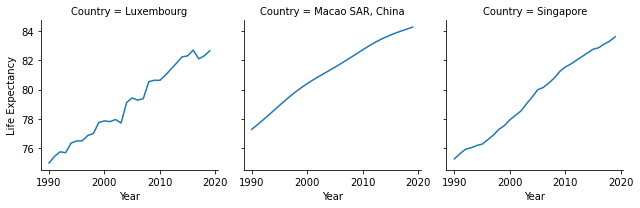

In [77]:
#Create FacetGrid
g = sns.FacetGrid(top3ss, col = 'Country')
g.map(sns.lineplot, 'Year', 'Life Expectancy');

Q27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

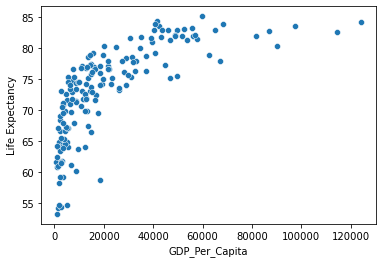

In [78]:
sns.scatterplot(data = gdp_le_2019, x = 'GDP_Per_Capita', y = 'Life Expectancy');

Q28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [79]:
gdp_le_2019['Life Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])

0.7090182746006474

The correlation coefficient indicates a strong positive linear relationship between GDP Per Capita and Life Expectancy. 


Q29. Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.


In [80]:
gdp_le_2019['logGDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])

<ipython-input-80-5affa406bfd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['logGDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])


In [81]:
gdp_le_2019.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,logGDP
0,Afghanistan,2019,2065.036398,Asia,64.833,3.314928
18,Albania,2019,13724.058790,Europe,78.573,4.137483


In [82]:
gdp_le_2019['Life Expectancy'].corr(gdp_le_2019['logGDP'])

0.848497584800642

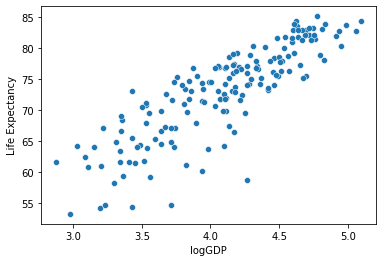

In [83]:
sns.scatterplot(data = gdp_le_2019, x = 'logGDP', y = 'Life Expectancy');

The correlation is stronger for the relationship between log GDP_Per_Capita and Life Expectancy. The scatterplot also shows a better positive linear relationship between the two variables. 

In [163]:
emp = pd.read_csv('../data/UNdata_Export_20220925_002155572.csv')

In [164]:
emp.head()

,Country or Area,Year,Area,Sex,Status in employment,Industry,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2000,Total,Both Sexes,Total,"Agriculture, hunting and forestry (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2009.0,703.0,1
1,Åland Islands,2000,Total,Both Sexes,Total,Fishing (ISIC Rev.3/3.1: Section B),Census - de jure - complete tabulation,"Final figure, complete",2009.0,104.0,1
2,Åland Islands,2000,Total,Both Sexes,Total,Mining and quarrying (ISIC Rev.3/3.1: Section C),Census - de jure - complete tabulation,"Final figure, complete",2009.0,2.0,1
3,Åland Islands,2000,Total,Both Sexes,Total,Manufacturing (ISIC Rev.3/3.1: Section D),Census - de jure - complete tabulation,"Final figure, complete",2009.0,1168.0,1
4,Åland Islands,2000,Total,Both Sexes,Total,"Electricity, gas and water supply (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2009.0,117.0,1


In [165]:
emp.drop(['Record Type', 'Reliability', 'Value Footnotes'], axis=1, inplace = True)

In [166]:
emp['Industry_n'] = emp['Industry'].str.split('(').str[0]

In [167]:
emp

,Country or Area,Year,Area,Sex,Status in employment,Industry,Source Year,Value,Industry_n
0,Åland Islands,2000,Total,Both Sexes,Total,"Agriculture, hunting and forestry (ISIC Rev.3/...",2009.0,703.0,"Agriculture, hunting and forestry"
1,Åland Islands,2000,Total,Both Sexes,Total,Fishing (ISIC Rev.3/3.1: Section B),2009.0,104.0,Fishing
2,Åland Islands,2000,Total,Both Sexes,Total,Mining and quarrying (ISIC Rev.3/3.1: Section C),2009.0,2.0,Mining and quarrying
3,Åland Islands,2000,Total,Both Sexes,Total,Manufacturing (ISIC Rev.3/3.1: Section D),2009.0,1168.0,Manufacturing
4,Åland Islands,2000,Total,Both Sexes,Total,"Electricity, gas and water supply (ISIC Rev.3/...",2009.0,117.0,"Electricity, gas and water supply"
...,...,...,...,...,...,...,...,...,...
58296,114,Including communication.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58297,115,Including renting and business activities.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58298,116,"Data include water supply; sewerage, waste man...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
58299,117,The figures were calculated by dividing and ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
emp = emp.dropna()

In [169]:
#emp.loc[emp['Industry'].str.contains('griculture'), 'Industry'] = 'Agriculture'


In [170]:
emp.loc[emp['Industry'].str.contains('griculture'), 'Industry'] = 'Agriculture'
emp.loc[emp['Industry_n'].str.contains('Electricity'), 'Industry_n'] = 'Utility Services'
emp.loc[emp['Industry_n'].str.contains('Fishing'), 'Industry_n'] = 'Agriculture'
#emp.loc[emp['Industry_n'].str.contains('Electricity'), 'Industry_n'] = 'Utility Services'

C:\Users\16156\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [171]:
#emp.loc[emp['Industry_n'].str.contains('Fishing'), 'Industry_n'] = 'Agriculture'

In [172]:
emp = emp[emp['Industry_n'].str.contains('not |Unknown')==False]



In [173]:
ind_list = emp['Industry_n'].values.tolist()

In [174]:
ind_list

['Agriculture, hunting and forestry ',
 'Agriculture',
 'Mining and quarrying ',
 'Manufacturing ',
 'Utility Services',
 'Construction ',
 'Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods ',
 'Hotels and restaurants ',
 'Transport, storage and communications ',
 'Financial intermediation ',
 'Real estate, renting and business activities ',
 'Public administration and defense; compulsory social security ',
 'Education ',
 'Health and social work ',
 'Other community, social and personal service activities ',
 'Activities of private households as employers and undifferentiated production activities of private households ',
 'Extraterritorial organizations and bodies ',
 'Total',
 'Agriculture, forestry and fishing ',
 'Mining and quarrying ',
 'Manufacturing ',
 'Utility Services',
 'Water supply; sewerage, waste management and remediation activities ',
 'Construction ',
 'Wholesale and retail trade; repair of motor vehicles and motorcy

In [175]:
emp['Industry_n'].nunique()

43

In [176]:
mydict = {'trade' : 'Trade', 'Agriculture':'Agriculture',
          'Wholesale':'Trade', 'Construction':'Construction',
          'transport':'Transportation','Education':'Education',
          'Mining':'Mining', 'Service':'Service',
          'estate':'Real Estate', 'Finance':'Finance', 'Financial':'Finance' ,
          'restaurants':'Service', 'administration':'Public Admin',
          'social':'Social Work', 'Activities':'Other', 
          'Extraterritorial':'Other', 'Manufacturing':'Manufacturing', 
          'private':'Other', 'supply':'Utility Services',
          'service':'Service', 'Information':'Information', 'Total':'Other', 
          'scientific':'Technology', 'health': 'Health', 'Arts':'Arts', 'Commerce':'Trade'}

In [177]:
new_ind_list = []
test = ['Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods ', 'private', 'Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods ','Wholesale and retail private; repair of motor vehicles, motorcycles and personal and household goods ']

for elem in ind_list: # loops through each sentence/string in ind_list 
    for key, value in mydict.items(): # loops through each dict key/value pair in the dictionary 
        if key.lower() in elem.lower(): # check if key in dctionary is inside the elem string from  the ind_list
            new_ind_list.append(value) 
            break# if it is present add the dictionary value to new list
        
    #new_ind_list.append(elem)

In [178]:
new_ind_list

['Agriculture',
 'Agriculture',
 'Mining',
 'Manufacturing',
 'Service',
 'Construction',
 'Trade',
 'Service',
 'Transportation',
 'Finance',
 'Real Estate',
 'Public Admin',
 'Education',
 'Social Work',
 'Service',
 'Other',
 'Other',
 'Other',
 'Agriculture',
 'Mining',
 'Manufacturing',
 'Service',
 'Other',
 'Construction',
 'Trade',
 'Transportation',
 'Service',
 'Information',
 'Finance',
 'Real Estate',
 'Other',
 'Service',
 'Public Admin',
 'Education',
 'Social Work',
 'Arts',
 'Service',
 'Service',
 'Other',
 'Other',
 'Agriculture',
 'Agriculture',
 'Mining',
 'Manufacturing',
 'Service',
 'Construction',
 'Trade',
 'Service',
 'Transportation',
 'Finance',
 'Real Estate',
 'Public Admin',
 'Education',
 'Social Work',
 'Service',
 'Other',
 'Other',
 'Other',
 'Agriculture',
 'Mining',
 'Manufacturing',
 'Service',
 'Other',
 'Construction',
 'Trade',
 'Transportation',
 'Service',
 'Information',
 'Finance',
 'Real Estate',
 'Other',
 'Service',
 'Public Admin',
 'Edu

In [179]:
len(new_ind_list) 

55945

In [180]:
len(ind_list)

55945

In [181]:
myset = set(new_ind_list)
myset

{'Agriculture',
 'Arts',
 'Construction',
 'Education',
 'Finance',
 'Information',
 'Manufacturing',
 'Mining',
 'Other',
 'Public Admin',
 'Real Estate',
 'Service',
 'Social Work',
 'Trade',
 'Transportation'}

In [182]:
count = 0
for key,value in mydict.items():
    count+=1
    print(str(count) + '- ' + key + ':' + value)
    

1- trade:Trade
2- Agriculture:Agriculture
3- Wholesale:Trade
4- Construction:Construction
5- transport:Transportation
6- Education:Education
7- Mining:Mining
8- Service:Service
9- estate:Real Estate
10- Finance:Finance
11- Financial:Finance
12- restaurants:Service
13- administration:Public Admin
14- social:Social Work
15- Activities:Other
16- Extraterritorial:Other
17- Manufacturing:Manufacturing
18- private:Other
19- supply:Utility Services
20- service:Service
21- Information:Information
22- Total:Other
23- scientific:Technology
24- health:Health
25- Arts:Arts
26- Commerce:Trade


In [183]:
type(new_ind_list)

list

In [184]:
emp['new_ind'] = new_ind_list

In [185]:
emp = emp.drop(['Industry'], axis = 1)

In [186]:
emp = emp.drop(['Industry_n'], axis = 1)

In [187]:
emp = emp.drop(['Source Year'], axis =1)

In [188]:
emp = emp.rename(columns = {'Country or Area':'Country', 'new_ind': 'Industry_G'})

In [189]:
emp.head(2)

,Country,Year,Area,Sex,Status in employment,Value,Industry_G
0,Åland Islands,2000,Total,Both Sexes,Total,703.0,Agriculture
1,Åland Islands,2000,Total,Both Sexes,Total,104.0,Agriculture


In [190]:
emp.groupby('Sex')['Industry_G'].value_counts()

Sex         Industry_G    
Both Sexes  Service           3849
            Other             3046
            Agriculture       1378
            Construction      1034
            Manufacturing     1029
            Trade             1012
            Transportation    1012
            Mining            1006
            Finance            909
            Real Estate        904
            Education          901
            Social Work        895
            Public Admin       889
            Information        466
            Arts               453
Female      Service           3799
            Other             3021
            Agriculture       1370
            Construction      1024
            Manufacturing     1019
            Trade             1003
            Transportation    1002
            Mining             994
            Finance            900
            Real Estate        893
            Education          891
            Social Work        885
            Public Admin    

In [191]:
emp.dtypes

Country                  object
Year                     object
Area                     object
Sex                      object
Status in employment     object
Value                   float64
Industry_G               object
dtype: object

In [192]:
emp['Status in employment'].unique()

array(['Total', 'Own account worker', 'Employee', 'Employer',
       'Contributing family members', "Member of producers' cooperative",
       'Unknown', 'Other'], dtype=object)

In [193]:
emp['Value'].describe()

count    5.594500e+04
mean     2.428295e+05
std      1.798397e+06
min      0.000000e+00
25%      8.100000e+01
50%      2.206000e+03
75%      3.627600e+04
max      1.096704e+08
Name: Value, dtype: float64

In [194]:
emp['Value'].max()

109670399.0

In [195]:
emp2 = emp.drop(['Year', 'Area', 'Sex', 'Status in employment'], axis = 1)

In [196]:
emp2.head()

,Country,Value,Industry_G
0,Åland Islands,703.0,Agriculture
1,Åland Islands,104.0,Agriculture
2,Åland Islands,2.0,Mining
3,Åland Islands,1168.0,Manufacturing
4,Åland Islands,117.0,Service


In [197]:
emp_pivoted = emp2.pivot_table(index = 'Country', columns = 'Industry_G', values = 'Value', aggfunc='sum')

In [198]:
emp_pivoted = emp_pivoted.dropna()

In [199]:
emp_pivoted['Sum'] = emp_pivoted.aggregate(func = np.sum, axis=1)

In [200]:
emp_pivoted.head()

Industry_G,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Sum
Country,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,248472.0,113624.0,351264.0,99196.0,5320084.0
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,261032.0,169316.0,409336.0,148568.0,8395692.0
Australia,4394420.0,736229.0,13398727.0,13296569.0,5982324.0,1339981.0,13306238.0,2485864.0,164816012.0,12972526.0,11792869.0,21702990.0,19386503.0,23369126.0,9339563.0,318319941.0
Austria,1167548.0,233700.0,2376164.0,2173644.0,1040980.0,376088.0,5159032.0,64336.0,32133260.0,2197804.0,1624164.0,4039152.0,2470092.0,5006104.0,1783976.0,61846044.0
Bahamas,9308.0,12582.0,57830.0,39150.0,34110.0,12032.0,22404.0,856.0,660358.0,67212.0,5916.0,187114.0,22748.0,91802.0,34144.0,1257566.0


In [202]:
emp_pivoted['AgPercent'] = 100*emp_pivoted['Agriculture']/emp_pivoted['Sum']

In [203]:
emp_pivoted['AgPercent'].describe()

count    67.000000
mean      8.153800
std       9.394327
min       0.079182
25%       1.516320
50%       2.941023
75%      13.625627
max      37.187679
Name: AgPercent, dtype: float64

<AxesSubplot:xlabel='AgPercent'>

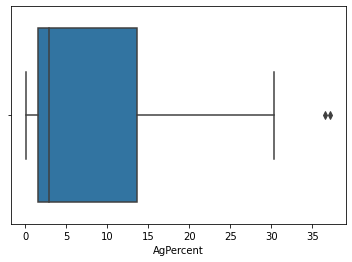

In [204]:
sns.boxplot(data=emp_pivoted, x = 'AgPercent')

In [205]:
Ag_heavy = emp_pivoted.sort_values('AgPercent', ascending = False).reset_index()[0:3]
Ag_heavy

Industry_G,Country,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Sum,AgPercent
0,Cambodia,35014560.0,85012.0,747008.0,776584.0,73312.0,27768.0,2321256.0,42932.0,47356084.0,1635468.0,13848.0,1266952.0,233924.0,3485600.0,1076040.0,94156348.0,37.187679
1,Lao People's Democratic Republic,10003184.0,22888.0,412408.0,317064.0,47844.0,29896.0,492240.0,55464.0,13990504.0,881840.0,1392.0,195764.0,69472.0,734156.0,113028.0,27367144.0,36.551801
2,Kenya,47473562.0,380192.0,2122778.0,1593398.0,624358.0,328040.0,1059780.0,347126.0,79171040.0,704360.0,222942.0,16648252.0,741516.0,2775730.0,2050882.0,156243956.0,30.384255


In [206]:
emp_pivoted['MajorInd'] = emp_pivoted.loc[:,['Agriculture', 'Arts', 'Construction', 'Education',
                                             'Finance', 'Information', 'Manufacturing', 'Mining',
                                             'Public Admin', 'Real Estate', 'Service',
                                             'Social Work', 'Trade', 'Transportation'] ].aggregate(func = np.max, axis=1)

In [207]:
emp_pivoted.head()

Industry_G,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Sum,AgPercent,MajorInd
Country,,,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,248472.0,113624.0,351264.0,99196.0,5320084.0,13.288888,706980.0
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,261032.0,169316.0,409336.0,148568.0,8395692.0,18.592774,1560992.0
Australia,4394420.0,736229.0,13398727.0,13296569.0,5982324.0,1339981.0,13306238.0,2485864.0,164816012.0,12972526.0,11792869.0,21702990.0,19386503.0,23369126.0,9339563.0,318319941.0,1.380504,23369126.0
Austria,1167548.0,233700.0,2376164.0,2173644.0,1040980.0,376088.0,5159032.0,64336.0,32133260.0,2197804.0,1624164.0,4039152.0,2470092.0,5006104.0,1783976.0,61846044.0,1.887830,5159032.0
Bahamas,9308.0,12582.0,57830.0,39150.0,34110.0,12032.0,22404.0,856.0,660358.0,67212.0,5916.0,187114.0,22748.0,91802.0,34144.0,1257566.0,0.740160,187114.0


In [208]:
listofInd = ['Agriculture', 'Arts', 'Construction', 'Education','Finance', 'Information', 'Manufacturing', 'Mining', 'Public Admin', 'Real Estate','Social Work', 'Trade', 'Transportation']

In [209]:
#maxInd = emp_pivoted.apply(lambda row: row[row == emp_pivoted['MajorInd']].index, axis = 1)


In [210]:
#df.apply(lambda row: row[row == 'x'].index, axis=1)

In [211]:
emp_pivoted['MajorInd_N'] = emp_pivoted.loc[:,'Agriculture':'Transportation'].isin(emp_pivoted['MajorInd']).idxmax(1)

In [212]:
emp_pivoted.head()

Industry_G,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Sum,AgPercent,MajorInd,MajorInd_N
Country,,,,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,248472.0,113624.0,351264.0,99196.0,5320084.0,13.288888,706980.0,Agriculture
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,261032.0,169316.0,409336.0,148568.0,8395692.0,18.592774,1560992.0,Agriculture
Australia,4394420.0,736229.0,13398727.0,13296569.0,5982324.0,1339981.0,13306238.0,2485864.0,164816012.0,12972526.0,11792869.0,21702990.0,19386503.0,23369126.0,9339563.0,318319941.0,1.380504,23369126.0,Trade
Austria,1167548.0,233700.0,2376164.0,2173644.0,1040980.0,376088.0,5159032.0,64336.0,32133260.0,2197804.0,1624164.0,4039152.0,2470092.0,5006104.0,1783976.0,61846044.0,1.887830,5159032.0,Manufacturing
Bahamas,9308.0,12582.0,57830.0,39150.0,34110.0,12032.0,22404.0,856.0,660358.0,67212.0,5916.0,187114.0,22748.0,91802.0,34144.0,1257566.0,0.740160,187114.0,Service


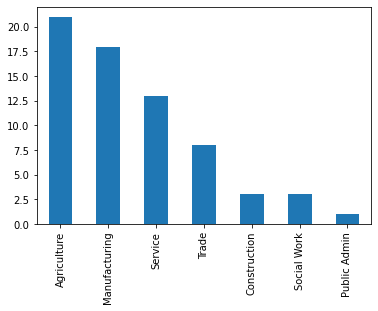

In [213]:
emp_pivoted['MajorInd_N'].value_counts().plot(kind = 'bar');

In [215]:
emp_pivoted['MajorInd_Percent'] = 100*emp_pivoted['MajorInd']/emp_pivoted['Sum']

In [216]:
emp_pivoted.head()

Industry_G,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Sum,AgPercent,MajorInd,MajorInd_N,MajorInd_Percent
Country,,,,,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,248472.0,113624.0,351264.0,99196.0,5320084.0,13.288888,706980.0,Agriculture,13.288888
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,261032.0,169316.0,409336.0,148568.0,8395692.0,18.592774,1560992.0,Agriculture,18.592774
Australia,4394420.0,736229.0,13398727.0,13296569.0,5982324.0,1339981.0,13306238.0,2485864.0,164816012.0,12972526.0,11792869.0,21702990.0,19386503.0,23369126.0,9339563.0,318319941.0,1.380504,23369126.0,Trade,7.341396
Austria,1167548.0,233700.0,2376164.0,2173644.0,1040980.0,376088.0,5159032.0,64336.0,32133260.0,2197804.0,1624164.0,4039152.0,2470092.0,5006104.0,1783976.0,61846044.0,1.887830,5159032.0,Manufacturing,8.341733
Bahamas,9308.0,12582.0,57830.0,39150.0,34110.0,12032.0,22404.0,856.0,660358.0,67212.0,5916.0,187114.0,22748.0,91802.0,34144.0,1257566.0,0.740160,187114.0,Service,14.879060


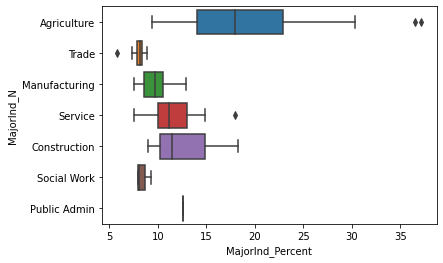

In [217]:
sns.boxplot(data=emp_pivoted, x='MajorInd_Percent', y = 'MajorInd_N');

In [218]:
emp_Major_Ind = emp_pivoted.loc[: , ['AgPercent', 'MajorInd', 'MajorInd_N', 'MajorInd_Percent']]


In [219]:
emp_Major_Ind = emp_Major_Ind.reset_index()

In [220]:
emp_Major_Ind.head()


Industry_G,Country,AgPercent,MajorInd,MajorInd_N,MajorInd_Percent
0,Albania,13.288888,706980.0,Agriculture,13.288888
1,Armenia,18.592774,1560992.0,Agriculture,18.592774
2,Australia,1.380504,23369126.0,Trade,7.341396
3,Austria,1.887830,5159032.0,Manufacturing,8.341733
4,Bahamas,0.740160,187114.0,Service,14.879060


In [221]:
test = pd.merge(gdp_le, emp_Major_Ind, on = 'Country')

In [222]:
test.head()

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,AgPercent,MajorInd,MajorInd_N,MajorInd_Percent
0,Albania,2019,13724.058790,Europe,78.573,13.288888,706980.0,Agriculture,13.288888
1,Albania,2018,13366.303065,Europe,78.458,13.288888,706980.0,Agriculture,13.288888
2,Albania,2017,12811.759436,Europe,78.333,13.288888,706980.0,Agriculture,13.288888
3,Albania,2016,12331.127754,Europe,78.194,13.288888,706980.0,Agriculture,13.288888
4,Albania,2015,11916.422315,Europe,78.025,13.288888,706980.0,Agriculture,13.288888


In [223]:
test.tail()

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,AgPercent,MajorInd,MajorInd_N,MajorInd_Percent
1420,Tonga,1994,4346.346353,Oceania,69.290,13.962366,39356.0,Agriculture,13.962366
1421,Tonga,1993,4149.137363,Oceania,69.223,13.962366,39356.0,Agriculture,13.962366
1422,Tonga,1992,4006.253518,Oceania,69.143,13.962366,39356.0,Agriculture,13.962366
1423,Tonga,1991,4002.603050,Oceania,69.049,13.962366,39356.0,Agriculture,13.962366
1424,Tonga,1990,3768.319679,Oceania,68.935,13.962366,39356.0,Agriculture,13.962366


In [224]:
test.isnull().sum()

Country             0
Year                0
GDP_Per_Capita      0
Continent           0
Life Expectancy     0
AgPercent           0
MajorInd            0
MajorInd_N          0
MajorInd_Percent    0
dtype: int64

In [225]:
test['AgPercent'].corr(test['GDP_Per_Capita'])

-0.7148194734873763

<AxesSubplot:xlabel='AgPercent', ylabel='GDP_Per_Capita'>

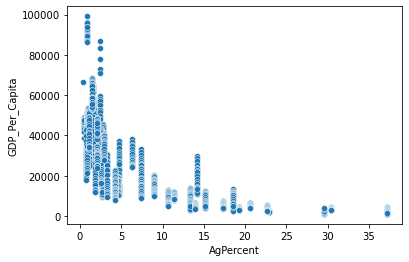

In [226]:
sns.scatterplot(data = test, x = 'AgPercent', y = 'GDP_Per_Capita')

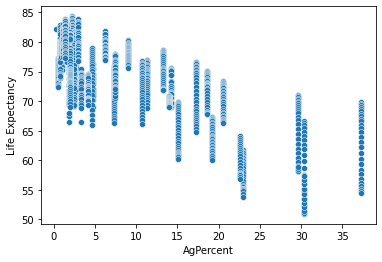

In [227]:
sns.scatterplot(data = test, x = 'AgPercent', y = 'Life Expectancy');
    

In [228]:
test['AgPercent'].corr(test['Life Expectancy'])

-0.7857116581660123